Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

Data Loading and Understanding

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df['IsActiveMember'] = df['IsActiveMember'].astype('object')
df['HasCrCard'] = df['HasCrCard'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 859.5+ KB


In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Exploratory Data Analysis (EDA)

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


In [11]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  plt.axvline(col_mean, color="blue", linestyle="--", label="Mean")
  plt.axvline(col_median, color="yellow", linestyle="-", label="Median")

  plt.legend()

  plt.show()

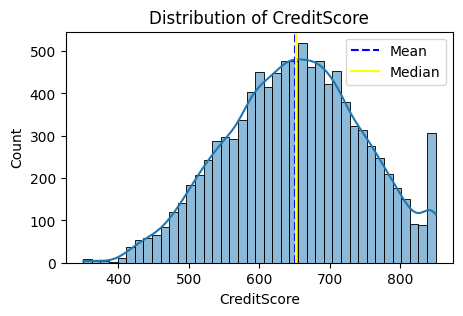

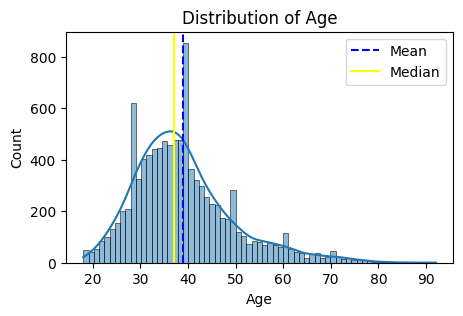

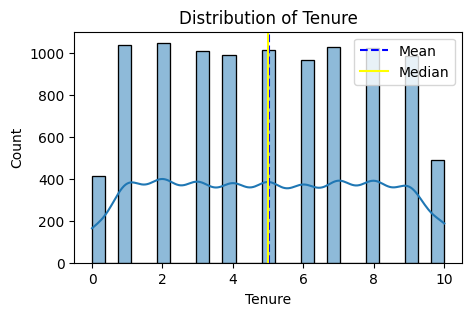

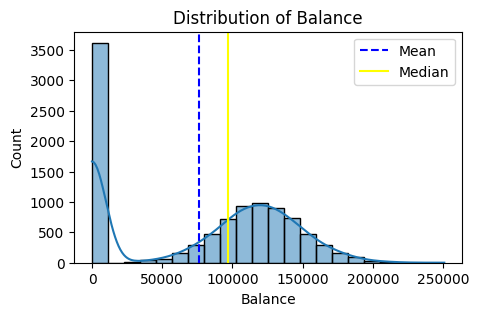

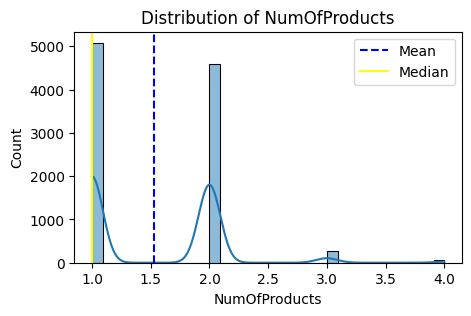

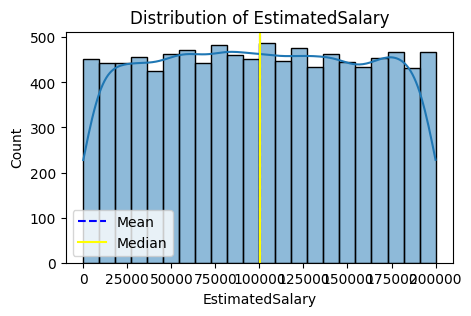

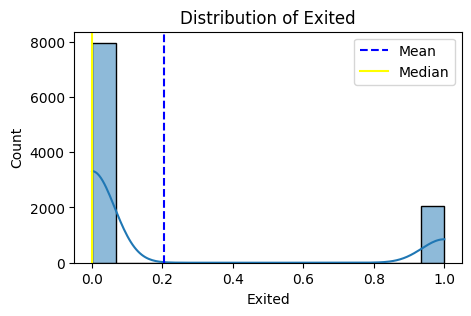

In [12]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plot_histogram(df, col)

In [13]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

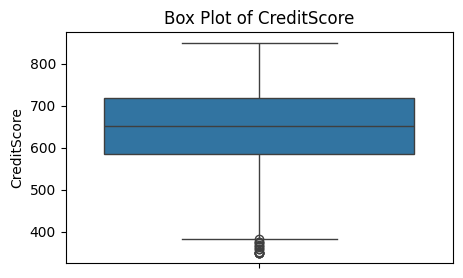

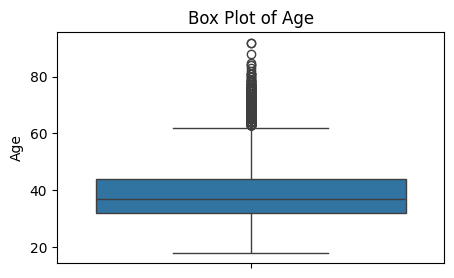

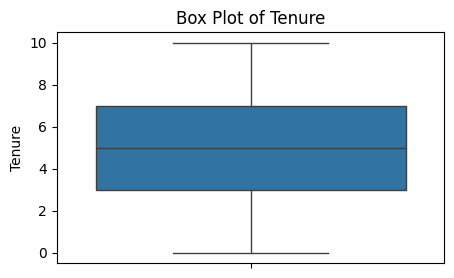

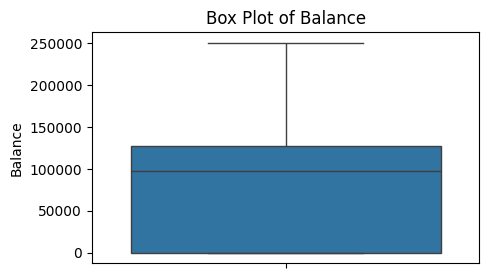

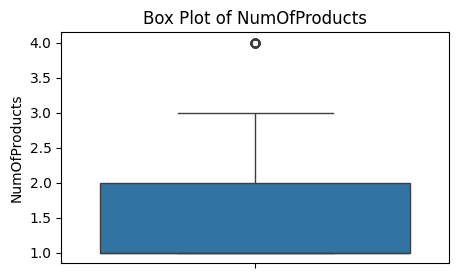

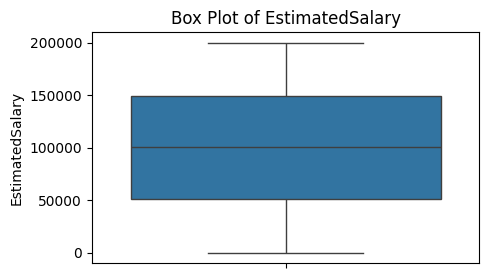

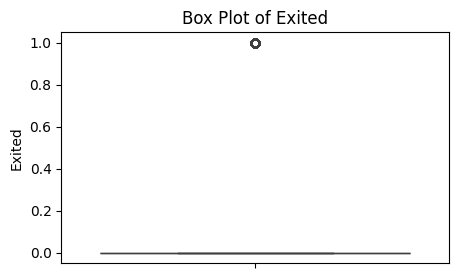

In [14]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
  plot_boxplot(df, col)

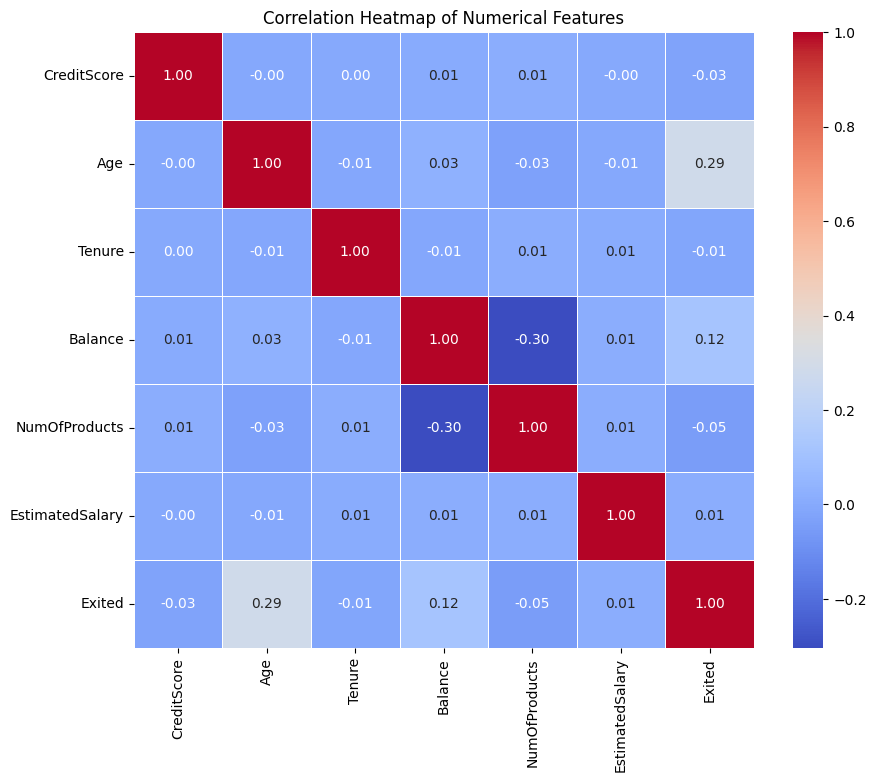

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Categorical features - Analysis

In [16]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 859.5+ KB


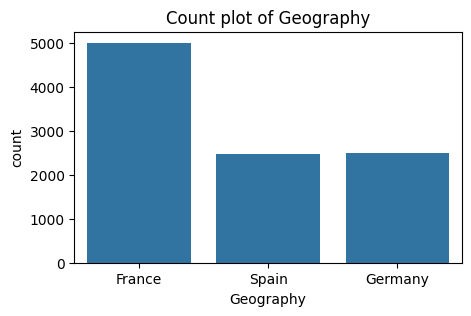

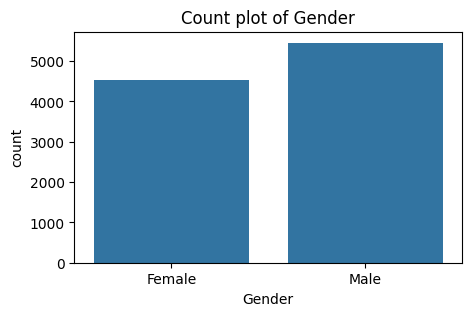

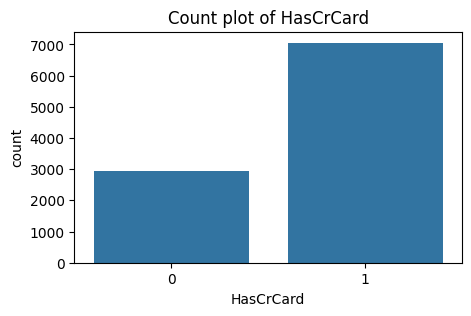

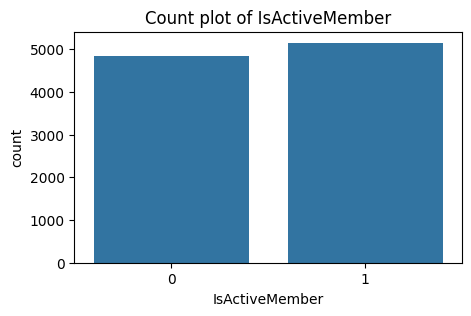

In [18]:
object_cols = df.select_dtypes(include="object").columns.to_list()

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count plot of {col}")
  plt.show()

4. Data Preprocessing

In [19]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


Label encoding of categorical fetaures

In [20]:
object_columns = df.select_dtypes(include="object").columns

In [21]:
print(object_columns)

Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype='object')


In [22]:
encoders = {}

for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [23]:
encoders

{'Geography': LabelEncoder(),
 'Gender': LabelEncoder(),
 'HasCrCard': LabelEncoder(),
 'IsActiveMember': LabelEncoder()}

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Training and test data split

In [25]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(y_train.shape)

(8000,)


In [28]:
print(y_train.value_counts())

Exited
0    6356
1    1644
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)

In [29]:
smote = SMOTE(random_state=42)

In [30]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [31]:
print(y_train_smote.shape)

(12712,)


In [32]:
print(y_train_smote.value_counts())

Exited
0    6356
1    6356
Name: count, dtype: int64


Model Training

In [33]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [34]:
cv_scores = {}

for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.85
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.86
----------------------------------------------------------------------


In [35]:
cv_scores

{'Decision Tree': array([0.72316162, 0.79276445, 0.81549961, 0.80802518, 0.8202203 ]),
 'Random Forest': array([0.75776642, 0.85922139, 0.88552321, 0.87844217, 0.89299764]),
 'XGBoost': array([0.76956351, 0.85292961, 0.89889851, 0.87332809, 0.88670338])}

In [36]:
rfc = RandomForestClassifier(random_state=42)

In [37]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [38]:
print(y_test.value_counts())

Exited
0    1607
1     393
Name: count, dtype: int64


Model Evaluation

In [39]:
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.825
Confusion Matrix:
 [[1394  213]
 [ 137  256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.65      0.59       393

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



In [40]:
model_data = {"model": rfc, "feature_names": X.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [41]:
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rfc = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train_smote, y_train_smote)

print("Best parameters found: ", random_search_rf.best_params_)
print("Best ROC-AUC score: ", random_search_rf.best_score_)

best_rfc = random_search_rf.best_estimator_

Best parameters found:  {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 459}
Best ROC-AUC score:  0.9270934874768837


In [42]:
y_pred_tuned_rf = best_rfc.predict(X_test)

print("Tuned Random Forest Model Evaluation:")
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_tuned_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned_rf))

y_proba_tuned_rf = best_rfc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba_tuned_rf)
print("\nROC-AUC Score on Test Set:", roc_auc)

print("Overfitting Analysis:")
cv_roc_auc = random_search_rf.best_score_
print(f"Cross-validated ROC-AUC on training data (SMOTE): {cv_roc_auc:.4f}")
print(f"ROC-AUC on test data: {roc_auc:.4f}")

if roc_auc < cv_roc_auc - 0.05:
    print("There is a noticeable drop in ROC-AUC from training to test set, suggesting some overfitting. The model might not generalize as well as expected based on cross-validation.")
elif roc_auc < cv_roc_auc:
    print("There is a slight drop in ROC-AUC from training to test set, which is expected. The model generalizes reasonably well.")
else:
    print("The ROC-AUC on the test set is comparable to or slightly better than the cross-validated training score, indicating good generalization and minimal overfitting.")

Tuned Random Forest Model Evaluation:
Accuracy Score:
 0.821

Confusion Matrix:
 [[1377  230]
 [ 128  265]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1607
           1       0.54      0.67      0.60       393

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000


ROC-AUC Score on Test Set: 0.8408869592479468
Overfitting Analysis:
Cross-validated ROC-AUC on training data (SMOTE): 0.9271
ROC-AUC on test data: 0.8409
There is a noticeable drop in ROC-AUC from training to test set, suggesting some overfitting. The model might not generalize as well as expected based on cross-validation.


In [43]:
param_dist_xgb = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1]
}

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=stratified_cv,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_smote, y_train_smote)

print("Best parameters found for XGBoost: ", random_search_xgb.best_params_)
print("Best ROC-AUC score for XGBoost: ", random_search_xgb.best_score_)

best_xgb = random_search_xgb.best_estimator_

Best parameters found for XGBoost:  {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 289, 'reg_alpha': 0.1, 'subsample': 0.8}
Best ROC-AUC score for XGBoost:  0.940298861729129


In [44]:
y_pred_tuned_xgb = best_xgb.predict(X_test)

print("Tuned XGBoost Model Evaluation:")
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_tuned_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned_xgb))

y_proba_tuned_xgb = best_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_proba_tuned_xgb)
print("\nROC-AUC Score on Test Set:", roc_auc_xgb)

print("Overfitting Analysis for Tuned XGBoost Model:")
cv_roc_auc_xgb = random_search_xgb.best_score_
print(f"Cross-validated ROC-AUC on training data (SMOTE): {cv_roc_auc_xgb:.4f}")
print(f"ROC-AUC on test data: {roc_auc_xgb:.4f}")

if roc_auc_xgb < cv_roc_auc_xgb - 0.05:
    print("There is a noticeable drop in ROC-AUC from training to test set, suggesting some overfitting. The model might not generalize as well as expected based on cross-validation.")
elif roc_auc_xgb < cv_roc_auc_xgb:
    print("There is a slight drop in ROC-AUC from training to test set, which is expected. The model generalizes reasonably well.")
else:
    print("The ROC-AUC on the test set is comparable to or slightly better than the cross-validated training score, indicating good generalization and minimal overfitting.")

Tuned XGBoost Model Evaluation:
Accuracy Score:
 0.819

Confusion Matrix:
 [[1398  209]
 [ 153  240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      1607
           1       0.53      0.61      0.57       393

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.82      0.82      2000


ROC-AUC Score on Test Set: 0.830894100397276
Overfitting Analysis for Tuned XGBoost Model:
Cross-validated ROC-AUC on training data (SMOTE): 0.9403
ROC-AUC on test data: 0.8309
There is a noticeable drop in ROC-AUC from training to test set, suggesting some overfitting. The model might not generalize as well as expected based on cross-validation.


In [45]:
print("RandomUnderSampler imported.")

RandomUnderSampler imported.


In [46]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Shape of y_train_rus:", y_train_rus.shape)
print("Class distribution in y_train_rus:\n", y_train_rus.value_counts())

Shape of y_train_rus: (3288,)
Class distribution in y_train_rus:
 Exited
0    1644
1    1644
Name: count, dtype: int64


In [47]:
print("Retraining Tuned Random Forest model with RandomUnderSampler data.")
best_rfc.fit(X_train_rus, y_train_rus)
print("Tuned Random Forest model retrained.")

Retraining Tuned Random Forest model with RandomUnderSampler data.
Tuned Random Forest model retrained.


In [48]:
y_pred_rus_rf = best_rfc.predict(X_test)
y_proba_rus_rf = best_rfc.predict_proba(X_test)[:, 1]

print("Tuned Random Forest Model Evaluation with RandomUnderSampler:")
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_rus_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rus_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rus_rf))
print("\nROC-AUC Score on Test Set:\n", roc_auc_score(y_test, y_proba_rus_rf))

Tuned Random Forest Model Evaluation with RandomUnderSampler:
Accuracy Score:
 0.788

Confusion Matrix:
 [[1277  330]
 [  94  299]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.48      0.76      0.59       393

    accuracy                           0.79      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000


ROC-AUC Score on Test Set:
 0.859590120196152


In [49]:
print("Retraining Tuned XGBoost model with RandomUnderSampler data.")
best_xgb.fit(X_train_rus, y_train_rus)
print("Tuned XGBoost model retrained.")

Retraining Tuned XGBoost model with RandomUnderSampler data.
Tuned XGBoost model retrained.


In [50]:
y_pred_rus_xgb = best_xgb.predict(X_test)
y_proba_rus_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("Tuned XGBoost Model Evaluation with RandomUnderSampler:")
print("Accuracy Score:\n", accuracy_score(y_test, y_pred_rus_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rus_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rus_xgb))
print("\nROC-AUC Score on Test Set:\n", roc_auc_score(y_test, y_proba_rus_xgb))

Tuned XGBoost Model Evaluation with RandomUnderSampler:
Accuracy Score:
 0.7825

Confusion Matrix:
 [[1267  340]
 [  95  298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      1607
           1       0.47      0.76      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.78      0.80      2000


ROC-AUC Score on Test Set:
 0.8401015911620755


In [51]:
feature_importances = best_rfc.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Sorted):")
print(importance_df)

Feature Importances (Sorted):
           Feature  Importance
3              Age    0.282336
6    NumOfProducts    0.149456
5          Balance    0.130571
9  EstimatedSalary    0.125875
0      CreditScore    0.122312
4           Tenure    0.073210
1        Geography    0.039630
8   IsActiveMember    0.038726
2           Gender    0.020723
7        HasCrCard    0.017161


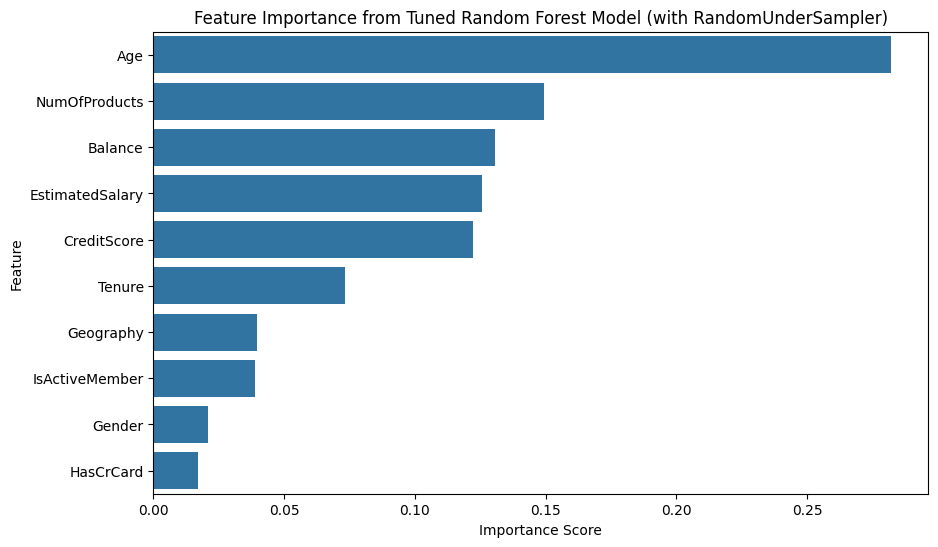

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Tuned Random Forest Model (with RandomUnderSampler)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [53]:
model_data_rus = {"model": best_rfc, "feature_names": X.columns.tolist()}
with open("customer_churn_model_rus.pkl", "wb") as f:
    pickle.dump(model_data_rus, f)

print("Best Tuned Random Forest model (RUS) saved as 'customer_churn_model_rus.pkl'.")

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

print("LabelEncoders loaded.")

Best Tuned Random Forest model (RUS) saved as 'customer_churn_model_rus.pkl'.
LabelEncoders loaded.


In [54]:
def predict_churn(model, encoders, input_data):
    if not isinstance(input_data, pd.DataFrame):
        input_data = pd.DataFrame([input_data])

    categorical_cols_to_encode = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
    for col in categorical_cols_to_encode:
        if col in input_data.columns and col in encoders:
            try:
                input_data[col] = encoders[col].transform(input_data[col])
            except ValueError as e:
                print(f"Warning: Unseen label encountered in column '{col}'. Error: {e}")
                raise

    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)[:, 1]

    return prediction[0], prediction_proba[0]

print("Predictive system function 'predict_churn' defined.")

Predictive system function 'predict_churn' defined.


In [58]:
sample_customer_data = X_test.iloc[0].copy()

sample_customer_data = sample_customer_data.astype(object)

original_categorical_values = {}
categorical_cols_to_transform = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols_to_transform:
    if col in X_test.columns and col in encoders:
        original_categorical_values[col] = encoders[col].inverse_transform([int(X_test.iloc[0][col])])[0]

for col, val in original_categorical_values.items():
    sample_customer_data[col] = val

print("Sample customer data for prediction:")
print(sample_customer_data)

loaded_model_data = pickle.load(open("customer_churn_model_rus.pkl", 'rb'))
loaded_model = loaded_model_data['model']

prediction, probability = predict_churn(loaded_model, encoders, sample_customer_data)

print(f"\nPrediction for sample customer: {'Churn' if prediction == 1 else 'No Churn'}")
print(f"Probability of churn: {probability:.4f}")

Sample customer data for prediction:
CreditScore           596.0
Geography           Germany
Gender                 Male
Age                    32.0
Tenure                  3.0
Balance            96709.07
NumOfProducts           2.0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary    41788.37
Name: 6252, dtype: object

Prediction for sample customer: No Churn
Probability of churn: 0.1286
